<a href="https://colab.research.google.com/github/FMurunga/E-Commmerce-Prodct-Recommender-System-ML-Prroject/blob/main/Ecommerce_product_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objectives**
Build a  performing product recommender and categorisation model.
->used to recommend similar products to users so that total time and money spent on platform per user will be increased
->have a model to categorise products correctly since there might be some wrongly categorised products in those platforms
->A product categorisation model is used to catch those products and place them back into their right categories to improve overall user experience on the platform.
->Operationalise the project with an MLOps platform named Layer.


In [ ]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10,5)

In [ ]:
#this is a semi-colon separated csv so include the delimiter tag to remove the ; and read tabulated output
df = pd.read_csv('https://raw.githubusercontent.com/FMurunga/DataScience-Projects/main/e-shop%20clothing%202008.csv', delimiter=';')
df.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [ ]:
#statistical rep of the dataset
df.describe()

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400842,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,0.0,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144420,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


In [ ]:
#missing values
df.isnull().sum() #clean data, no missing values

year                       0
month                      0
day                        0
order                      0
country                    0
session ID                 0
page 1 (main category)     0
page 2 (clothing model)    0
colour                     0
location                   0
model photography          0
price                      0
price 2                    0
page                       0
dtype: int64

In [ ]:
df.duplicated() #No duplicates

0         False
1         False
2         False
3         False
4         False
          ...  
165469    False
165470    False
165471    False
165472    False
165473    False
Length: 165474, dtype: bool

In [ ]:
#correlation
df.corr()

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,-0.075098,0.026093,0.065502,0.970961,0.017557,-0.035279,-0.017712,0.011102,0.012700,-0.014658,0.020898
day,NaN,-0.075098,1.000000,-0.021744,0.011551,0.161369,-0.001251,0.005313,0.000596,-0.000211,-0.002818,0.004254,0.011125
order,NaN,0.026093,-0.021744,1.000000,-0.064709,0.021829,0.151693,0.046427,0.014854,0.061820,-0.064779,0.000772,0.204106
country,NaN,0.065502,0.011551,-0.064709,1.000000,0.065869,0.132817,0.009789,-0.009072,0.028725,-0.045345,-0.017536,0.026695
session ID,NaN,0.970961,0.161369,0.021829,0.065869,1.000000,0.016123,-0.032034,-0.016721,0.010585,0.011669,-0.012742,0.023254
page 1 (main category),NaN,0.017557,-0.001251,0.151693,0.132817,0.016123,1.000000,0.230577,0.015939,0.213113,-0.364791,-0.137944,0.347992
colour,NaN,-0.035279,0.005313,0.046427,0.009789,-0.032034,0.230577,1.000000,0.042062,0.074755,-0.091159,-0.080147,0.249322
location,NaN,-0.017712,0.000596,0.014854,-0.009072,-0.016721,0.015939,0.042062,1.000000,0.067678,-0.084653,0.073187,-0.091865
model photography,NaN,0.011102,-0.000211,0.061820,0.028725,0.010585,0.213113,0.074755,0.067678,1.000000,-0.212395,0.072944,0.258315


In [ ]:
# function to remove consecutive duplicates from product view sequence list
def remove_consec_duplicates(raw_list):
  previous_value=None
  new_list= []
  #loop thrrough the product list
  for elem in raw_list:
    if elem != previous_value:    #if a product in the view sequence is not similar to the previous value
      new_list.append(elem)        #add the product_id to the new product list
      previous_value = elem       

    return new_list


def generate_sequential_products():
  #1.clean the data
     #rename columns
  data= df.rename(columns={"session ID":"session_id","page 2 (clothing model)":"product_id"})
     # Remove sessions where only a single product is viewed
  data= data.groupby("session_id").filter(lambda x: len(x)>1)
  #Group product view sequences in order by session id(cleaned data)
  data = data.sort_values("order").groupby("session_id")["product_id"].apply(list)
  # Remove consecutive duplicate product views from the sequences genereated in the previous step
  data = data.apply(remove_consec_duplicates)

  #Convert series to data frame
  data = data.to_frame().reset_index().rename(columns={"product_id": "chronological_product_sequence"})

  return data


In [ ]:
session_based_product_sequences = generate_sequential_products()
session_based_product_sequences.head(5)

,session_id,chronological_product_sequence
0,1,[A13]
1,2,[B31]
2,3,[B17]
3,4,[A34]
4,6,[C7]


Generate product vectors (embeddings) using Word2Vec algorithm

In [ ]:
#function to create product embeddings
def create_product_embeddings():
  import gensim
  from gensim.models import Word2Vec

  #create CBOW gensim model
  session_product_sequences = session_based_product_sequences['chronological_product_sequence'].apply(list)
  word2vec_model = gensim.models.Word2Vec(session_product_sequences,min_count=1, size=10, window=5)

  # numpy.ndarrays of product vectors
  product_vectors = word2vec_model.wv.vectors

  productID_list = word2vec_model.wv.vocab.keys()
  vector_list = word2vec_model.wv.vectors.tolist()
  data_tuples = list(zip(productID_list,vector_list))

  #convert it into a dataframe
  product_ids_and_vectors = pd.DataFrame(data_tuples, columns=['Product_ID','Vectors'])

  return product_ids_and_vectors


In [ ]:
product_ids_vectors = create_product_embeddings()
product_ids_vectors.head(5)

,Product_ID,Vectors
0,A13,"[0.04227500036358833, 0.008462971076369286, -0..."
1,B31,"[-0.00045040782424621284, -0.0262288935482502,..."
2,B17,"[0.035631291568279266, -0.04791325330734253, 0..."
3,A34,"[-0.004939473699778318, -0.03977396711707115, ..."
4,C7,"[0.04916932433843613, 0.01210189051926136, 0.0..."


Step IV: Fit K-Means model on the product vectors (embeddings)

In [ ]:
#function to fit K-Means Algorithm
def fit_KMeans():
  # Get product vectors from Word2Vec as an array
  array_product_vectors = np.array(product_ids_vectors["Vectors"].values.tolist())

   # Fit K-Means algorithm on those embeddings
  kmeans_model = KMeans(n_clusters=10,random_state=0).fit(array_product_vectors)

   # Cluster Distribution Plot
  plot_cluster_distribution(kmeans_model)

  # Cluster Scatter Plot
  plot_cluster_scatter(array_product_vectors)

  return kmeans_model

def plot_cluster_distribution(kmeans_model):
  plt.hist(kmeans_model.labels_, rwidth=0.7)
  plt.ylabel("Number of Products")
  plt.xlabel("Cluster No")

  plt.show()

  # clear all plots and figures from memory
  plt.figure().clear()
  plt.close()
  plt.cla()
  plt.clf()

def plot_cluster_scatter(array_product_vectors):
  pca = PCA(n_components=2)
  two_dimension_vectors = pca.fit_transform(array_product_vectors)

  kmeans_model = KMeans(n_clusters=10,random_state=0).fit(two_dimension_vectors)
  label = kmeans_model.fit_predict(two_dimension_vectors)

  #getting centroids
  centroids = kmeans_model.cluster_centers_
  u_labels = np.unique(kmeans_model.labels_)

 #plotting the results
  for i in u_labels:
      plt.scatter(two_dimension_vectors[label==i,0],two_dimension_vectors[label==i,1])
  plt.scatter(centroids[:,0],centroids[:,1], s=80, color='k')
  plt.legend(bbox_to_anchor =(1, 1))

  plt.ylabel("Number of Products")
  plt.xlabel("Cluster No")

  plt.show()
    # clear all plots and figures from memory
  plt.figure().clear()
  plt.close()
  plt.cla()
  plt.clf()

  


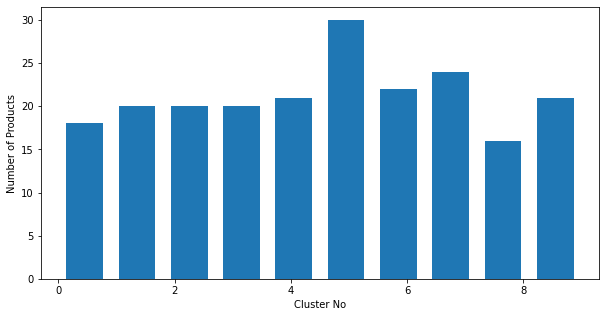

No handles with labels found to put in legend.


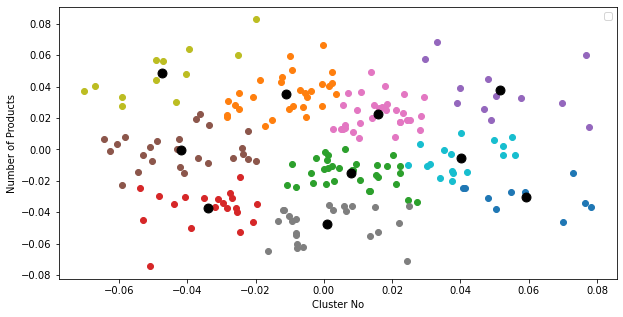

<Figure size 720x360 with 0 Axes>

In [ ]:
model = fit_KMeans()

Save clusters as a data frame

In [ ]:
def save_final_product_clusters():
  array_product_vectors = np.array(product_ids_vectors["Vectors"].values.tolist())
  assigned_cluster_no = model.fit_predict(array_product_vectors)

  product_ids_vectors["Cluster_No"]  = assigned_cluster_no
  cluster_members_df = product_ids_vectors[["Product_ID","Cluster_No"]].groupby("Cluster_No")["Product_ID"].apply(list).to_frame().reset_index().rename(columns={'Product_ID': 'Cluster_Member_List'})

  return cluster_members_df

In [ ]:
cluster_members_df = save_final_product_clusters()
cluster_members_df.head(10)

,Cluster_No,Cluster_Member_List
0,0,"[A34, P33, C36, C59, C26, C30, A20, C51, B9, C..."
1,1,"[P61, P15, B8, B12, P3, C16, B21, P5, C56, C9,..."
2,2,"[C49, A10, B30, C19, P63, C1, P23, B32, P48, P..."
3,3,"[A11, P12, A12, A16, B15, A30, B23, B25, C6, P..."
4,4,"[A4, C17, C8, B13, P8, A26, A8, A35, A41, P24,..."
5,5,"[A18, A15, B19, P40, P19, C14, C58, C57, A21, ..."
6,6,"[B17, C7, A17, A6, A2, A5, P11, C44, C13, B10,..."
7,7,"[A1, B7, P16, B11, B16, A7, B14, C11, C24, C27..."
8,8,"[B31, B2, A14, P10, P1, A28, P39, C4, C53, C15..."
9,9,"[A13, B4, B1, P4, P6, B3, C12, C48, B26, P7, C..."


Get similar product recommendations for a given product: Test the model

In [ ]:
# Product ID to generate recommendations for:any product from the list
product_id='A11' 

# Get Vector (Embedding) array of the given product
vector_array = np.array(product_ids_vectors[product_ids_vectors["Product_ID"]==product_id]["Vectors"].tolist())

#get cluster no for the given array
cluster_no = model.predict(vector_array)[0]

# Get members list of the cluster that the given product is assigned to 
cluster_members_list = cluster_members_df[cluster_members_df["Cluster_No"]==cluster_no]['Cluster_Member_List'].iloc[0]
# Randomly select 5 product recommendations from the cluster members excluding the given product
from random import sample
cluster_members_list.remove(product_id)

five_product_recommendations = sample(cluster_members_list, 5)

print("5 Similar Product Recommendations for {}: ".format(product_id),five_product_recommendations)

5 Similar Product Recommendations for A11:  ['P12', 'B34', 'P2', 'C6', 'B23']
